In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/global_food_wastage_dataset_grupal.csv')

df.head(25)



,Pais,Año,Categoria de Comida,Desperdicio Total (Ton),Perdida Economica (Millon $),Desperdicio Promedio por cabeza (Kg),Poblacion (MIllon),Porcentaje de desperdicio
0,Australia,2019,Frutas y Vegetales,19268.63,18686.68,72.69,87.59,53.64
1,Indonesia,2019,Comida Preparada,3916.97,4394.48,192.52,1153.99,30.61
2,Germany,2022,Productos Lacteos,9700.16,8909.16,166.94,1006.11,48.08
3,France,2023,Frutas y Vegetales,46299.69,40551.22,120.19,953.05,31.91
4,France,2023,Bebidas,33096.57,36980.82,104.74,1105.47,36.06
5,Germany,2024,Granos y Cereales,9932.43,8383.34,120.27,908.01,43.93
6,China,2024,Productos Lacteos,9885.28,10090.00,193.59,155.89,34.05
7,China,2019,Frutas y Vegetales,12791.20,12233.28,90.80,1229.29,59.90
8,UK,2019,Carnes y Mariscos,14795.65,14346.97,128.91,450.33,59.01
9,India,2019,Granos y Cereales,12118.32,13631.17,141.75,359.26,42.42


In [ ]:
df.describe()

,Año,Desperdicio Total (Ton),Perdida Economica (Millon $),Desperdicio Promedio por cabeza (Kg),Poblacion (MIllon),Porcentaje de desperdicio
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2021.015600,25061.780072,25039.703870,109.46397,706.606416,50.060890
std,1.999239,14245.119588,14620.236429,51.93373,402.546464,11.596203
min,2018.000000,502.610000,406.690000,20.09000,11.290000,30.020000
25%,2019.000000,12783.737500,12612.477500,64.05000,350.602500,40.012500
50%,2021.000000,24865.220000,24428.155000,110.08000,713.530000,50.295000
75%,2023.000000,37471.035000,37146.037500,154.52500,1057.255000,60.125000
max,2024.000000,49990.760000,59228.930000,199.97000,1399.970000,70.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Pais                                  5000 non-null   object 
 1   Año                                   5000 non-null   int64  
 2   Categoria de Comida                   5000 non-null   object 
 3   Desperdicio Total (Ton)               5000 non-null   float64
 4   Perdida Economica (Millon $)          5000 non-null   float64
 5   Desperdicio Promedio por cabeza (Kg)  5000 non-null   float64
 6   Poblacion (MIllon)                    5000 non-null   float64
 7   Porcentaje de desperdicio             5000 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [ ]:
#Top 5 paises con mas desperdicio en el ultimo año (2024)

#Aqui vamos a conseguir el ultimo año del dataframe
ultimo_anio=df['Año'].max()
print(ultimo_anio)
#filtramos el dataframe para que me traiga solo los paises del ultimo año
df_ultimo_anio=df[df['Año']==ultimo_anio]
#Creamos una nueva version del df para visualizar solo dos valores que son el pais y su desperdicio total en Tons
desp_ultimo_anio=df_ultimo_anio.groupby('Pais')['Desperdicio Total (Ton)'].sum()
#Top 5 de los paises con mas desperdicio
Top_paises=desp_ultimo_anio.sort_values(ascending=False).head(10)
print(f'Los paises con mas desperdicio en el {ultimo_anio} son:')
display(Top_paises)


2024
Los paises con mas desperdicio en el 2024 son:


,Desperdicio Total (Ton)
Pais,
Mexico,1140293.74
Italy,1074171.67
Turkey,1052913.58
Saudi Arabia,1014545.85
Spain,985878.46
Canada,984274.59
South Africa,968937.93
China,960186.97
USA,945506.12


In [ ]:
#Top 5 Categorias que mas se desperdician
df_alimentos_mas_desperdiciados= df.groupby('Categoria de Comida')['Desperdicio Total (Ton)'].sum()

df_alimentos_mas_desperdiciados=df_alimentos_mas_desperdiciados.sort_values(ascending=False).head(5)
print(f'Los alimentos que mas se desperdician son:')
display(df_alimentos_mas_desperdiciados)

Los alimentos que mas se desperdician son:


,Desperdicio Total (Ton)
Categoria de Comida,
Comida Preparada,17929317.92
Bebidas,16354455.29
Objetos de Reposteria,15587955.51
Frutas y Vegetales,15522081.20
Carnes y Mariscos,15371347.52


In [ ]:
Los alimentos que mas se desperdician son:
Desperdicio Total (Ton)
Categoria de Comida
Comida Preparada	17929317.92
Bebidas	16354455.29
Objetos de Reposteria	15587955.51
Frutas y Vegetales	15522081.20
Carnes y Mariscos	15371347.52


Comparando la pérdida económica para los Top 5 países en los últimos 3 años: [2024, 2023, 2022].

 Comparación de la Pérdida Económica total entre los últimos 3 años para el Top 5 de países:


,2024 Perdida Economica (Millon $),2023 Perdida Economica (Millon $),2022 Perdida Economica (Millon $)
Pais,,,
Mexico,1151823.94,846008.62,1217377.87
Italy,1042279.74,1369272.56,808055.30
Turkey,1037173.76,959262.27,846011.04
Saudi Arabia,1031343.42,915724.91,510804.79
Spain,1012660.01,1020901.23,795357.50


/tmp/ipython-input-2224912808.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(


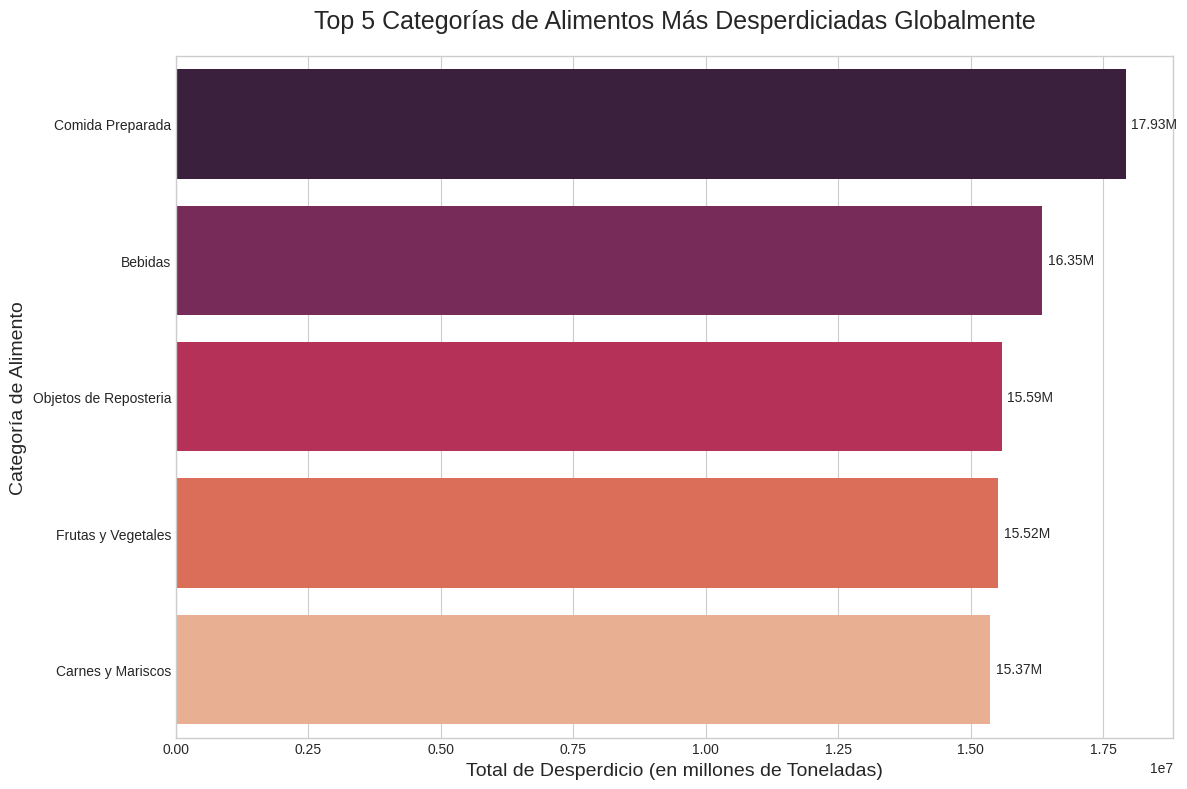

In [ ]:

# Configurar el estilo y tamaño del gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))

# Crear el gráfico de barras horizontal
# Usamos .index para los nombres de las categorías y .values para las cantidades
df_alimentos_mas_desperdiciados= df.groupby('Categoria de Comida')['Desperdicio Total (Ton)'].sum()

df_alimentos_mas_desperdiciados=df_alimentos_mas_desperdiciados.sort_values(ascending=False).head(5)

grafico = sns.barplot(
    x = df_alimentos_mas_desperdiciados.values,
    y = df_alimentos_mas_desperdiciados.index,
    palette = 'rocket'
)

# Añadir títulos y etiquetas claras
plt.title('Top 5 Categorías de Alimentos Más Desperdiciadas Globalmente', fontsize = 18, pad = 20)
plt.xlabel('Total de Desperdicio (en millones de Toneladas)', fontsize = 14)
plt.ylabel('Categoría de Alimento', fontsize=14)

# Opcional: Añadir el valor exacto al final de cada barra para mayor claridad
for i in grafico.patches:
    # Se formatea el número para que sea más legible (en millones)
    valor = f'{i.get_width() / 1_000_000:.2f}M'
    grafico.text(i.get_width() + 100000, i.get_y() + i.get_height() / 2,
                 valor, va='center')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

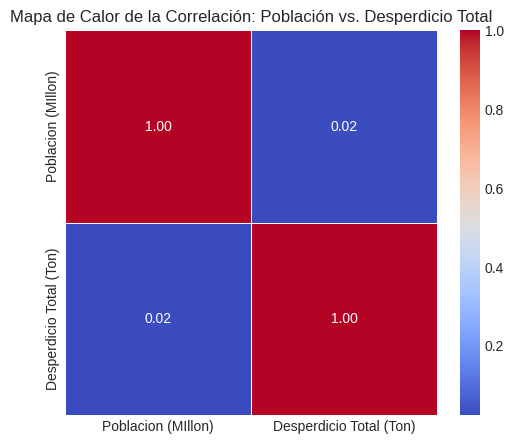

In [ ]:

# --- PREPARACIÓN DE DATOS ---
# Seleccionar las columnas de interés
# **Asegúrate de usar los nombres de columnas correctos de tu DataFrame.**
columnas_heatmap = ['Poblacion (MIllon)', 'Desperdicio Total (Ton)']
df_heatmap = df[columnas_heatmap].dropna() # Eliminar N/A si los hay

# --- GENERAR EL MAPA DE CALOR ---
plt.figure(figsize=(6, 5))
# Calcular la matriz de correlación de las dos variables
matriz_correlacion = df_heatmap.corr()

# Crear el mapa de calor
sns.heatmap(
    matriz_correlacion,
    annot=True, # Mostrar el valor de correlación en las celdas
    cmap='coolwarm', # Elegir un esquema de color (rojo-azul es estándar para correlación)
    fmt=".2f", # Formato de los números a dos decimales
    linewidths=.5, # Espacio entre celdas
    cbar=True # Mostrar la barra de color
)

plt.title('Mapa de Calor de la Correlación: Población vs. Desperdicio Total')
plt.show()

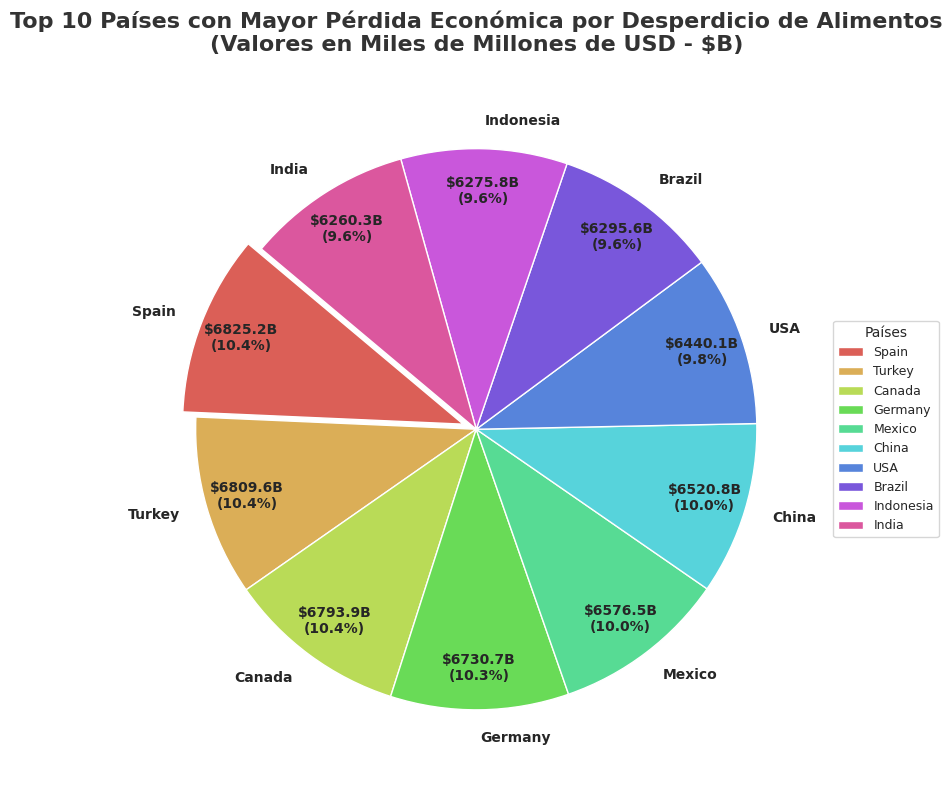

In [ ]:
# --- CALCULAR TOP 10 PAÍSES POR PÉRDIDA ECONÓMICA ---
top_10_perdida = df.groupby('Pais')['Perdida Economica (Millon $)'].sum().nlargest(10)

# --- CONFIGURAR ESTILO (opcional, pero recomendado) ---
sns.set_style("whitegrid")  # Fondo limpio
plt.figure(figsize=(12, 8))  # Tamaño adecuado para 10 categorías

# --- CREAR PIE CHART CON DETALLES PROFESIONALES ---
wedges, texts, autotexts = plt.pie(
    top_10_perdida,
    labels=top_10_perdida.index,
    autopct=lambda p: f'${(p/100 * top_10_perdida.sum() / 1000):.1f}B\n({p:.1f}%)',  # Valores en miles de millones (B) + %
    startangle=140,
    colors=sns.color_palette("hls", 10),  # Paleta con colores distinguibles
    explode=[0.05] + [0] * 9,  # Destaca el primer país (el de mayor pérdida)
    pctdistance=0.85,  # Ajusta la posición del %
    textprops={'fontsize': 10, 'weight': 'bold'}  # Texto legible
)

# --- TÍTULO Y LEYENDA ---
plt.title(
    'Top 10 Países con Mayor Pérdida Económica por Desperdicio de Alimentos\n'
    '(Valores en Miles de Millones de USD - $B)',
    fontsize=16,
    pad=20,
    fontweight='bold',
    color='#333333'
)

# --- AJUSTES FINALES PARA EVITAR SOLAPAMIENTOS ---
plt.legend(
    wedges,
    top_10_perdida.index,
    title="Países",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),  # Leyenda fuera del gráfico
    fontsize=9
)

plt.tight_layout()  # Optimiza el espacio
plt.show()


In [ ]:
conclusiones = """
5. Conclusiones

- Identificación de puntos críticos de desperdicio:
  El análisis realizado permitió identificar patrones significativos en el comportamiento del desperdicio alimentario a nivel global. En el año 2024, países como México, Italia y Turquía se posicionaron como los principales generadores de desperdicio, acumulando millones de toneladas en diversas categorías. Este fenómeno no se limita a una región específica, lo que sugiere que el problema es estructural y requiere atención coordinada. Las categorías más afectadas fueron comida preparada, bebidas y objetos de repostería, lo que indica una alta vulnerabilidad en productos de consumo rápido, especialmente aquellos con vida útil limitada o que dependen de una cadena de frío eficiente.

- Impacto económico y social:
  Además del volumen de desperdicio, se evidenció una pérdida económica considerable, con países como México y China registrando cifras multimillonarias. Este tipo de pérdida no solo afecta la rentabilidad de las empresas del sector alimentario, sino que también representa un desperdicio de recursos naturales, energía y mano de obra. En contextos donde la inseguridad alimentaria sigue siendo una preocupación, el contraste entre el exceso y la escasez se vuelve aún más crítico.

- Recomendaciones prácticas:
  Para enfrentar este desafío, se proponen medidas concretas que pueden ser adoptadas tanto por gobiernos como por empresas privadas:
  - Mejorar la planificación de compras: Es fundamental implementar sistemas de gestión de inventario basados en datos históricos y proyecciones de demanda más precisas. Esto permitiría reducir el exceso de productos que no llegan a ser consumidos.
  - Optimizar el almacenamiento: La infraestructura de conservación debe ser reforzada, especialmente en productos perecederos. Esto incluye mejorar la cadena de frío, capacitar al personal en prácticas de manejo y establecer protocolos de rotación de inventario.
  - Educación y concienciación: Promover campañas de sensibilización dirigidas a consumidores y distribuidores puede generar un cambio cultural en torno al valor de los alimentos y la responsabilidad compartida en su uso eficiente.

- Proyección futura:
  Si no se toman medidas urgentes, el desperdicio alimentario continuará creciendo, con implicaciones directas en el medio ambiente, la economía y la salud pública. Sin embargo, los datos también muestran oportunidades claras para intervenir y mejorar. La digitalización de procesos, el uso de inteligencia artificial para prever demanda y el fortalecimiento de políticas públicas pueden marcar una diferencia significativa en los próximos años.
"""

